In [2]:
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
import numpy as np
from scope_onset.utils.data_splitting import SortedStratifiedKFold

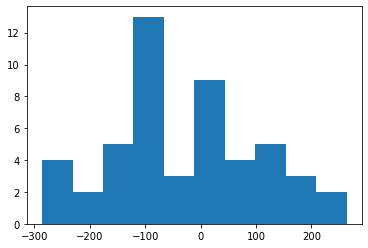

In [3]:
# The data
X, y = make_regression(n_samples=50, random_state=0)

plt.hist(y)
pass

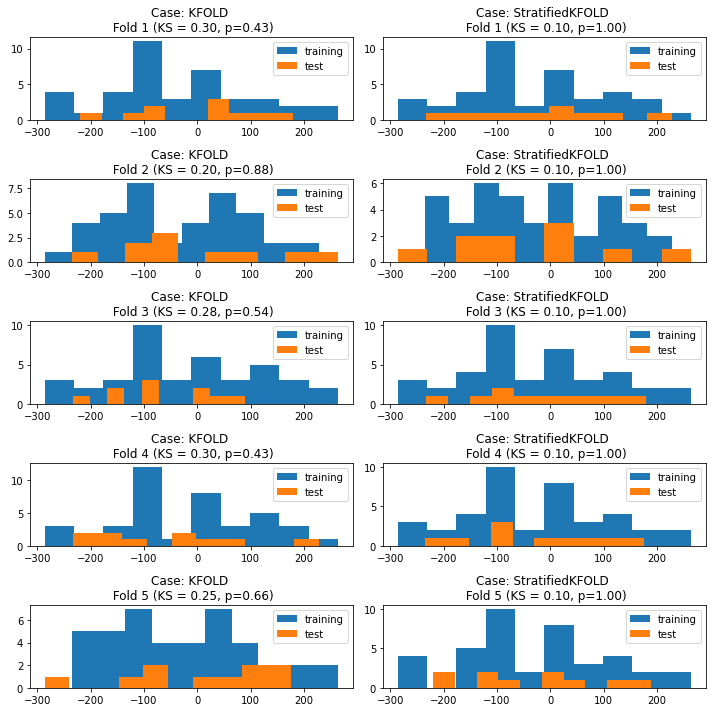

In [4]:
n_splits = 5
cv_normal = KFold(n_splits=n_splits, shuffle=True, random_state=0)
cv_stratified = SortedStratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

fig, axs = plt.subplots(nrows=n_splits, ncols=2, figsize=(10,10))

for jj, cv in enumerate([cv_normal, cv_stratified]):
  case="StratifiedKFOLD" if jj==1 else "KFOLD"
  for ii, (train_index, test_index) in enumerate(cv.split(X, y)):
    y_train, y_test = y[train_index], y[test_index]

    # Compute differences between training and test sets
    # using a kolmogorv-smirnov test

    stat, p = ks_2samp(y_train, y_test)

    axs[ii, jj].hist(y_train, label="training")
    axs[ii, jj].hist(y_test, label="test")
    axs[ii, jj].set_title("Case: %s \n Fold %d (KS = %.2f, p=%.2f)" % (case,
                                                                      ii + 1,
                                                                      stat,
                                                                      p))
    axs[ii, jj].legend()


plt.tight_layout()

(array([1., 1., 1., 2., 2., 1., 2., 1., 2., 2.]),
 array([-286.14589783, -239.53890438, -192.93191093, -146.32491748,
         -99.71792404,  -53.11093059,   -6.50393714,   40.10305631,
          86.71004976,  133.3170432 ,  179.92403665]),
 <BarContainer object of 10 artists>)

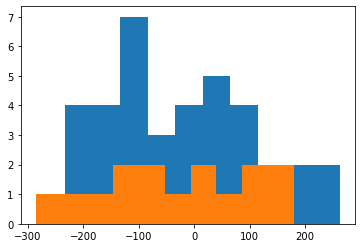

In [5]:
from scope_onset.utils.data_splitting import continuously_stratified_train_test_split

X_train, X_test, y_train, y_test = continuously_stratified_train_test_split(X, y, test_size=0.3, stratify=y)

plt.hist(y_train, label="training")
plt.hist(y_test, label="testing")

(array([1., 1., 6., 3., 1., 1., 0., 0., 1., 1.]),
 array([-209.77969482, -171.226661  , -132.67362719,  -94.12059338,
         -55.56755957,  -17.01452575,   21.53850806,   60.09154187,
          98.64457568,  137.1976095 ,  175.75064331]),
 <BarContainer object of 10 artists>)

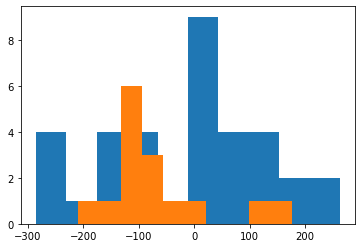

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.hist(y_train, label="training")
plt.hist(y_test, label="testing")